In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score



In [19]:
df = pd.read_csv('appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [25]:
x = df [['Temperature (°C)']]


y = df['Energy Consumption (kWh)']

In [27]:
x


,Temperature (°C)
0,22.490802
1,34.014286
2,29.639879
3,26.973170
4,18.120373
...,...
95,24.875912
96,25.454657
97,23.550820
98,15.508383


In [29]:
y

0     2.292604
1     3.251925
2     3.009868
3     1.703533
4     1.702201
        ...   
95    2.079686
96    2.506915
97    2.525658
98    1.689184
99    2.129374
Name: Energy Consumption (kWh), Length: 100, dtype: float64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train

,Temperature (°C)
55,33.437485
88,32.744255
26,18.993476
42,15.687770
69,34.737739
...,...
60,22.773546
71,18.974314
14,18.636499
92,30.215701


In [35]:
x_test

,Temperature (°C)
83,16.271167
53,32.896547
70,30.444895
45,28.250446
44,20.175600
39,23.803050
22,20.842893
80,32.262069
10,15.411690
0,22.490802


In [37]:
 y_train


55    3.378030
88    3.756114
26    1.727990
42    2.140188
69    3.864685
        ...   
60    1.885728
71    1.237203
14    1.912189
92    2.898876
51    2.767117
Name: Energy Consumption (kWh), Length: 80, dtype: float64

In [39]:
y_test


83    1.955394
53    3.037917
70    2.426014
45    2.370351
44    2.413076
39    2.531079
22    2.086846
80    4.159094
10    1.998870
0     2.292604
18    2.167836
30    3.658183
73    3.279415
33    3.360548
90    2.150219
4     1.702201
76    2.702528
77    1.764216
12    2.900005
31    1.928337
Name: Energy Consumption (kWh), dtype: float64

In [43]:
x_train.shape

(80, 1)

In [45]:
y_train.shape

(80,)

In [47]:
x_test.shape

(20, 1)

In [49]:
y_test.shape

(20,)

In [51]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred = model.predict(x_test)

In [55]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [57]:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

r2=r2_score(y_test,y_pred)
print(f"R-Squared: {r2}")

Mean Squared Error: 0.1634248784292506
R-Squared: 0.6119478445218713


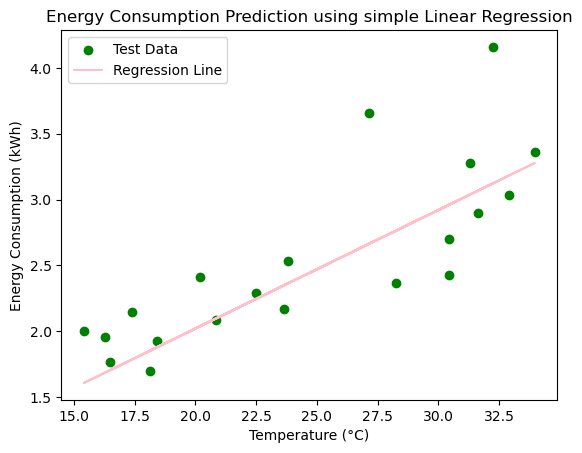

In [61]:
plt.scatter(x_test,y_test,color='green', label='Test Data')
plt.plot(x_test,y_pred,color='pink',label='Regression Line')

plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using simple Linear Regression')
plt.show()

In [63]:
import joblib
joblib.dump(model , 'appliance_energy_model.pkl')


['appliance_energy_model.pkl']

Accuracy: 0.9737
Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



AttributeError: module 'matplotlib.pyplot' has no attribute 'xl'

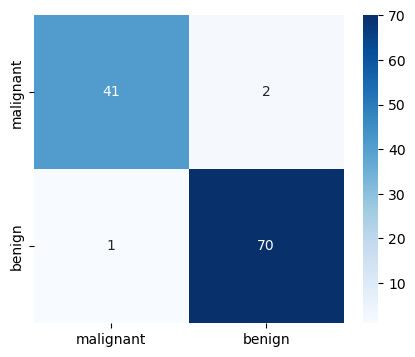

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (example: Breast Cancer dataset)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for better convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualizing Confusion Matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xl



Mean Squared Error: 0.0723
R² Score: 0.9941


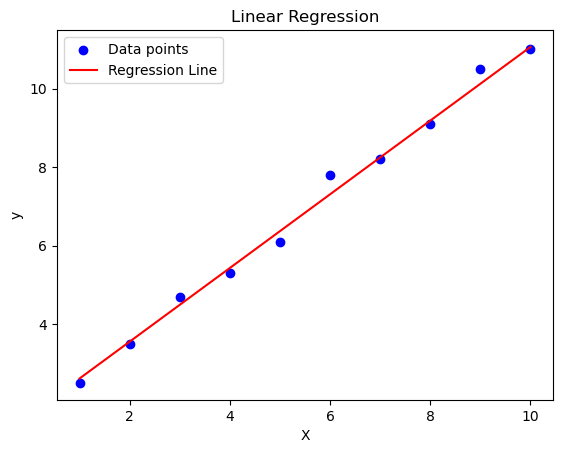

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2.5, 3.5, 4.7, 5.3, 6.1, 7.8, 8.2, 9.1, 10.5, 11.0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}')
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')

# Plot
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [5, 3, 6, 2, 8, 4, 9, 1, 7, 5],
    'Target': [2.5, 3.5, 4.7, 5.3, 6.1, 7.8, 8.2, 9.1, 10.5, 11.0]
})

X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}')
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')


Mean Squared Error: 0.0830
R² Score: 0.9932


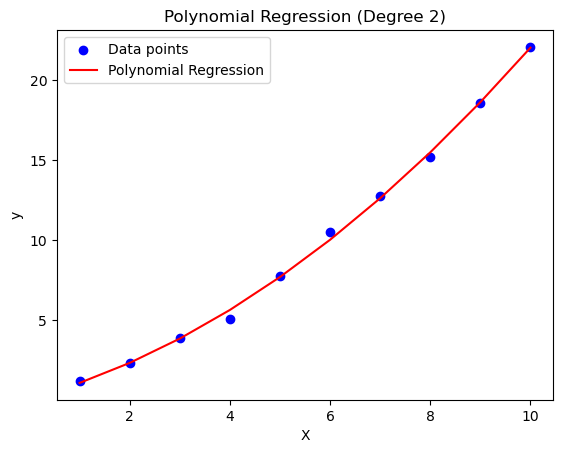

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Generate non-linear data
X = np.arange(1, 11).reshape(-1, 1)
y = np.array([1.2, 2.3, 3.9, 5.1, 7.8, 10.5, 12.8, 15.2, 18.6, 22.1])

# Transform features to polynomial degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, y_pred, color='red', label="Polynomial Regression")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression (Degree 2)')
plt.show()


In [9]:
from sklearn.linear_model import Ridge, Lasso

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Train Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Print Scores
print(f'Ridge R² Score: {r2_score(y_test, ridge_pred):.4f}')
print(f'Lasso R² Score: {r2_score(y_test, lasso_pred):.4f}')


Ridge R² Score: 0.9669
Lasso R² Score: 0.9882


In [11]:
from sklearn.linear_model import Ridge, Lasso

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Train Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Print Scores
print(f'Ridge R² Score: {r2_score(y_test, ridge_pred):.4f}')
print(f'Lasso R² Score: {r2_score(y_test, lasso_pred):.4f}')


Ridge R² Score: 0.9669
Lasso R² Score: 0.9882


In [13]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Visualization using Seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



ValueError: Found input variables with inconsistent numbers of samples: [2, 10]

Confusion Matrix:
 [[39  4]
 [ 1 70]]


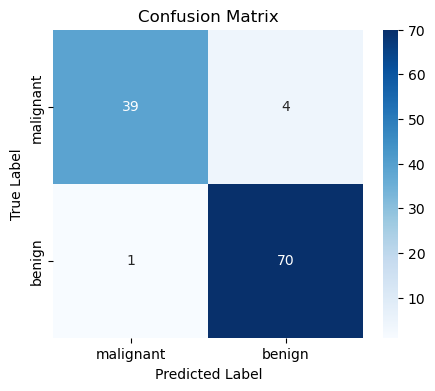

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Visualization using Seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv("gimport joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset (example)
df = pd.read_csv("green_tech_data.csv")
X = df.drop(columns=['Target'])  
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "random_forest_model.pkl")
print("Model saved successfully!")
reen_tech_data.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


SyntaxError: unterminated string literal (detected at line 4) (1203520800.py, line 4)

In [21]:
coefficients=pd.DataFrame(model.coef_.T,index=X.columns=['Coefficient'])
print(coefficients|)

SyntaxError: invalid syntax (1193781082.py, line 1)

In [23]:
import pandas as pd

# Create DataFrame of coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])

# Print the coefficients
print(coefficients)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [25]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset (example)
df = pd.read_csv("green_tech_data.csv")
X = df.drop(columns=['Target'])  
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "random_forest_model.pkl")
print("Model saved successfully!")


KeyError: "['Target'] not found in axis"

In [29]:
print('hello')

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import silhouette_score



In [41]:

data = pd.read_csv("green_tech_data.csv")
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [45]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0         -0.323112      -1.599230            0.426196        -1.505121   
1          1.623434       0.475167           -1.484683         0.137700   
2          0.884509      -0.629113           -1.219270         0.169484   
3          0.434049       0.036822            1.304832         0.500994   
4         -1.061365       1.404924            0.304251         0.804649   

   sustainability  
0        2.380476  
1       -0.420084  
2       -0.420084  
3       -0.420084  
4       -0.420084  


C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'elbow method')

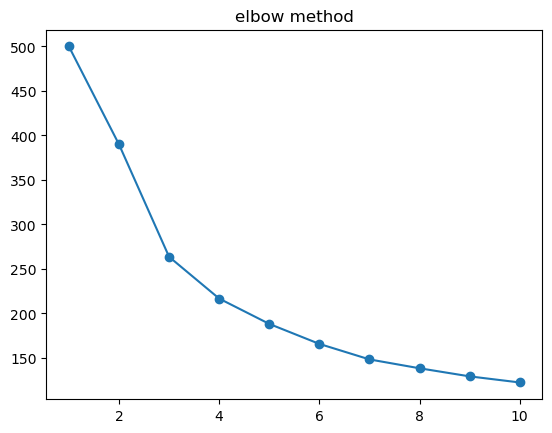

In [51]:
inertia=[]
#shift tab for info
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_range,inertia,marker='o')
plt.title('elbow method')

In [55]:
sil_score=silhouette_score(data_scaled,data['cluster'])
print(f'Silhouette score:{sil_score}')

KeyError: 'Cluster'

In [57]:
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'silhouette score : {sil_score}')

KeyError: 'cluster'

In [59]:
sil_score = silhouette_score(data_scaled, data['Cluster'])
print(f'silhouette score : {sil_score}')

KeyError: 'Cluster'

In [61]:
print('bye bye')

bye bye
